In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import datetime
from dateutil.relativedelta import relativedelta
from datetime import date
from datetime import datetime
import seaborn as sns
from matplotlib import pyplot
%matplotlib inline

# import data

In [2]:
df= pd.read_excel("C:/Users/44742/Documents/Highways accident reporting data (to be used).xlsx", 
               na_values='')

C:\Users\44742\AppData\Local\Temp\ipykernel_19076\4253394476.py:1: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  df= pd.read_excel("C:/Users/44742/Documents/Highways accident reporting data (to be used).xlsx",


In [3]:
df.head(3) 

,PublishedRecordId,Region,Site/Project,Event Type,Date and Time of Event,Time into Shift,Impact,vehicles involved?,Type of Person,Location,...,Part of Body Affected,Injury Type,Experience in Current Role,Age Range,Weather / Visibility,Potential Severity Rating,Actual Severity Rating,Potential Severity Rating Score,"Above ground, on ground or below ground",Structural safety risk scores
0,131601,East - Outstations & ROCs,South Mimms Outstation,Undesired Circumstance / Near Miss,2022-08-09 18:20:00,NaN,NaN,True,Employee,Carriageway Slip Rd K,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,***REDACTED***,NaN,***REDACTED***
1,131600,East - Outstations & ROCs,South Mimms Outstation,Undesired Circumstance / Near Miss,2022-08-09 17:00:00,NaN,NaN,False,Employee,Carriageway B,...,NaN,NaN,NaN,NaN,NaN,***REDACTED***,NaN,***REDACTED***,NaN,***REDACTED***
2,131599,Yorkshire & North East - Outstations & ROCs,Calder Park ROC,Undesired Circumstance / Near Miss,2022-08-08 20:14:00,NaN,NaN,False,Employee,Carriageway Slip Rd J,...,NaN,NaN,NaN,NaN,NaN,***REDACTED***,NaN,***REDACTED***,NaN,***REDACTED***


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64912 entries, 0 to 64911
Data columns (total 24 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   PublishedRecordId                        64912 non-null  int64         
 1   Region                                   64912 non-null  object        
 2   Site/Project                             64912 non-null  object        
 3    Event Type                              64912 non-null  object        
 4   Date and Time of Event                   64912 non-null  datetime64[ns]
 5   Time into Shift                          0 non-null      float64       
 6   Impact                                   0 non-null      float64       
 7   vehicles involved?                       62956 non-null  object        
 8   Type of Person                           64911 non-null  object        
 9   Location                               

In [5]:
a= df['Injury Type'].unique()

In [6]:
len(a) #there are 297 unique elements in site column

122

In [7]:
df[' Event Type'].unique() #different types of events classified

array(['Undesired Circumstance / Near Miss', 'Incursion / IPV Strike',
       'Infrastructure / Asset', 'Environmental',
       'Personal illness or injury', 'Structural Safety', 'Security',
       'Facilities / Site', 'Utility Strike'], dtype=object)

In [8]:
df=df.rename (columns= {' Event Type':'Event Type'} )

In [9]:
len(df['Event Type'].unique()) #number of event types classified

9

[Text(57515, 0, '74.55%'),
 Text(1964, 1, '2.55%'),
 Text(1733, 2, '2.25%'),
 Text(1219, 3, '1.58%'),
 Text(808, 4, '1.05%'),
 Text(530, 5, '0.69%'),
 Text(406, 6, '0.53%'),
 Text(406, 7, '0.53%'),
 Text(331, 8, '0.43%')]

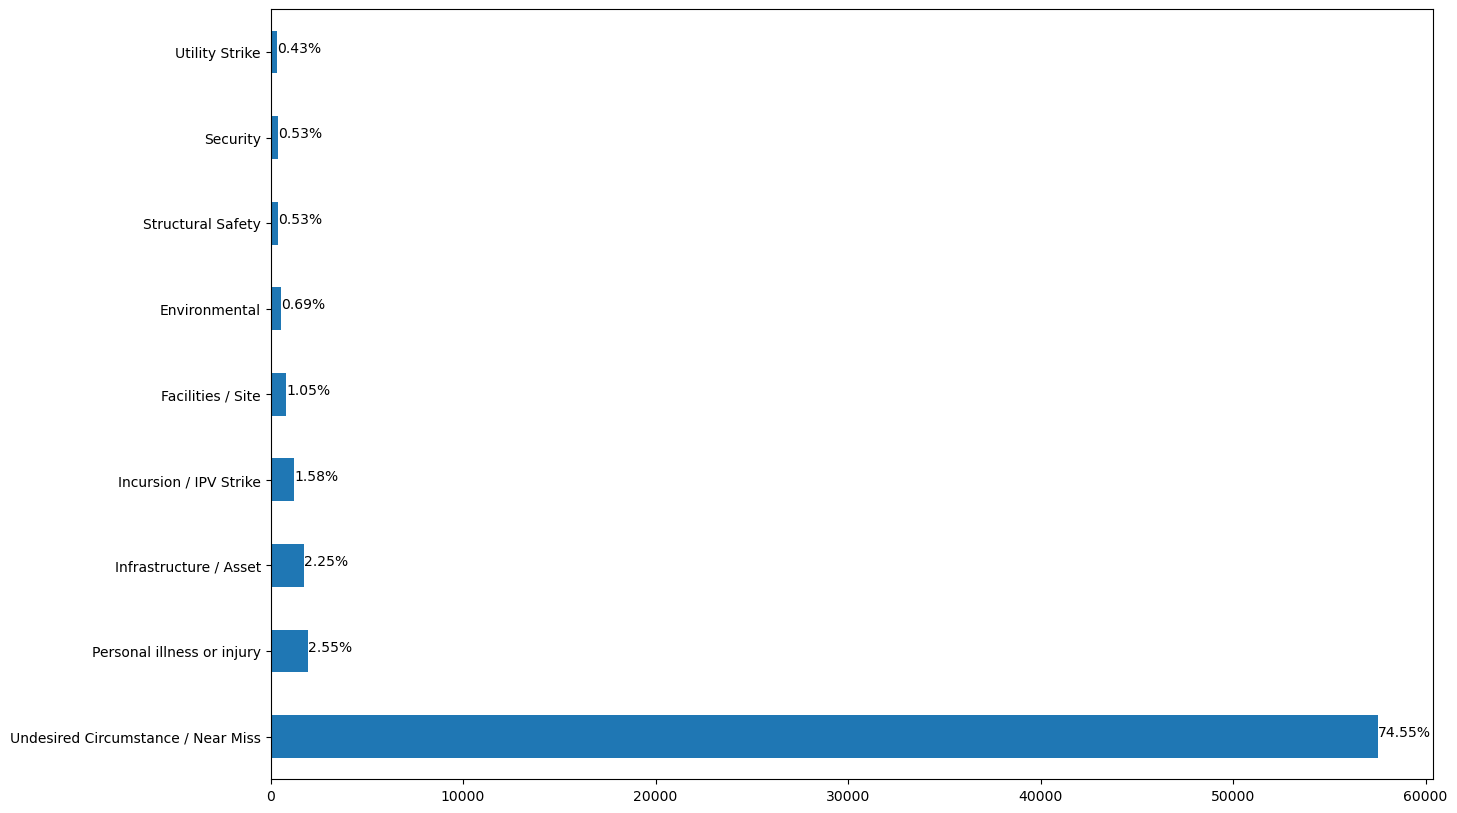

In [10]:
rcParams['figure.figsize']=15,10
s=df['Event Type'].value_counts()
ax= df['Event Type'].value_counts().plot(kind='barh')
[ax.text(v, i, '{:.2f}%'.format(100*v/77149)) for i, v in enumerate(s)]

# computing the 'time into shift' when incident happened

In [11]:
df['Date and Time of Event']= pd.to_datetime(df['Date and Time of Event'])

In [12]:
#computing the time into shift when incident happened
df['time2']=pd.Series(df['Date and Time of Event']) 
df['time1']=pd.Series(df['Shift Start Date and Time'])
df['Time into Shift'] = df['time2'] - df['time1']
df['Time into Shift']=df['Time into Shift']/np.timedelta64(1,'h')
for i in df['time1']:
    if i=='NaN':
        df['time1'] = pd.DatetimeIndex(df['Date and Time of Event']).time
df.head()

,PublishedRecordId,Region,Site/Project,Event Type,Date and Time of Event,Time into Shift,Impact,vehicles involved?,Type of Person,Location,...,Experience in Current Role,Age Range,Weather / Visibility,Potential Severity Rating,Actual Severity Rating,Potential Severity Rating Score,"Above ground, on ground or below ground",Structural safety risk scores,time2,time1
0,131601,East - Outstations & ROCs,South Mimms Outstation,Undesired Circumstance / Near Miss,2022-08-09 18:20:00,4.333333,NaN,True,Employee,Carriageway Slip Rd K,...,NaN,NaN,NaN,NaN,NaN,***REDACTED***,NaN,***REDACTED***,2022-08-09 18:20:00,2022-08-09 14:00:00
1,131600,East - Outstations & ROCs,South Mimms Outstation,Undesired Circumstance / Near Miss,2022-08-09 17:00:00,3.000000,NaN,False,Employee,Carriageway B,...,NaN,NaN,NaN,***REDACTED***,NaN,***REDACTED***,NaN,***REDACTED***,2022-08-09 17:00:00,2022-08-09 14:00:00
2,131599,Yorkshire & North East - Outstations & ROCs,Calder Park ROC,Undesired Circumstance / Near Miss,2022-08-08 20:14:00,6.233333,NaN,False,Employee,Carriageway Slip Rd J,...,NaN,NaN,NaN,***REDACTED***,NaN,***REDACTED***,NaN,***REDACTED***,2022-08-08 20:14:00,2022-08-08 14:00:00
3,131598,North West - Outstations & ROCs,Milness Outstation,Undesired Circumstance / Near Miss,2022-08-09 17:10:00,3.166667,NaN,False,Employee,NaN,...,NaN,NaN,NaN,***REDACTED***,NaN,***REDACTED***,NaN,***REDACTED***,2022-08-09 17:10:00,2022-08-09 14:00:00
4,131597,East - Operations,DBFO - M40 J1-15 Denham to Warwick (area 30),Undesired Circumstance / Near Miss,2022-08-08 12:30:00,5.500000,NaN,False,Contractor,Off Network e.g. Local Authority Road Footpath...,...,NaN,NaN,NaN,NaN,NaN,***REDACTED***,NaN,***REDACTED***,2022-08-08 12:30:00,2022-08-08 07:00:00


# finding the 'season' when incident happened based on months

In [13]:
df['month'] = pd.DatetimeIndex(df['Date and Time of Event']).month

In [14]:
df['Year'] = pd.DatetimeIndex(df['Date and Time of Event']).year

In [15]:
df['month'].unique()

array([ 8,  7,  6,  4,  5,  1,  3, 12,  2, 10, 11,  9], dtype=int64)

In [16]:
conditions=[(df['month']==12), (df['month']<3), (df['month']>=3) & (df['month']<6), (df['month']>=6) & (df['month']<9)
           , (df['month']>=9) & (df['month']<12)]

Values= ['Winter', 'Winter','Spring', 'Summer', 'Autumn']

df['Season'] = np.select(conditions, Values)
#df.loc[df['month']==12 & (df['month']<3), 'Season'] ='winter'
#df.loc[df['month']>=3 & (df['month']<6), 'Season'] ='Spring'

In [17]:
df['Season'].unique()

array(['Summer', 'Spring', 'Winter', 'Autumn'], dtype=object)

In [18]:
df.head(5)

,PublishedRecordId,Region,Site/Project,Event Type,Date and Time of Event,Time into Shift,Impact,vehicles involved?,Type of Person,Location,...,Potential Severity Rating,Actual Severity Rating,Potential Severity Rating Score,"Above ground, on ground or below ground",Structural safety risk scores,time2,time1,month,Year,Season
0,131601,East - Outstations & ROCs,South Mimms Outstation,Undesired Circumstance / Near Miss,2022-08-09 18:20:00,4.333333,NaN,True,Employee,Carriageway Slip Rd K,...,NaN,NaN,***REDACTED***,NaN,***REDACTED***,2022-08-09 18:20:00,2022-08-09 14:00:00,8,2022,Summer
1,131600,East - Outstations & ROCs,South Mimms Outstation,Undesired Circumstance / Near Miss,2022-08-09 17:00:00,3.000000,NaN,False,Employee,Carriageway B,...,***REDACTED***,NaN,***REDACTED***,NaN,***REDACTED***,2022-08-09 17:00:00,2022-08-09 14:00:00,8,2022,Summer
2,131599,Yorkshire & North East - Outstations & ROCs,Calder Park ROC,Undesired Circumstance / Near Miss,2022-08-08 20:14:00,6.233333,NaN,False,Employee,Carriageway Slip Rd J,...,***REDACTED***,NaN,***REDACTED***,NaN,***REDACTED***,2022-08-08 20:14:00,2022-08-08 14:00:00,8,2022,Summer
3,131598,North West - Outstations & ROCs,Milness Outstation,Undesired Circumstance / Near Miss,2022-08-09 17:10:00,3.166667,NaN,False,Employee,NaN,...,***REDACTED***,NaN,***REDACTED***,NaN,***REDACTED***,2022-08-09 17:10:00,2022-08-09 14:00:00,8,2022,Summer
4,131597,East - Operations,DBFO - M40 J1-15 Denham to Warwick (area 30),Undesired Circumstance / Near Miss,2022-08-08 12:30:00,5.500000,NaN,False,Contractor,Off Network e.g. Local Authority Road Footpath...,...,NaN,NaN,***REDACTED***,NaN,***REDACTED***,2022-08-08 12:30:00,2022-08-08 07:00:00,8,2022,Summer


# count frequency of event type

In [19]:
df['Event Type'].value_counts()


Undesired Circumstance / Near Miss    57515
Personal illness or injury             1964
Infrastructure / Asset                 1733
Incursion / IPV Strike                 1219
Facilities / Site                       808
Environmental                           530
Structural Safety                       406
Security                                406
Utility Strike                          331
Name: Event Type, dtype: int64

In [20]:
#condition2= [(df['Event Type']=='Personal illness or injury'), (df['Event Type']=='Undesired Circumstance / Near Miss')
 #           (df['Event Type']=='Infrastructure / Asset'),(df['Event Type']=='Incursion / IPV Strike'),(df['Event Type']=='Facilities / Site')
  #          ,(df['Event Type']=='Environmental'),(df['Event Type']=='Structural Safety'),(df['Event Type']=='Security')
   #         ,(df['Event Type']=='Utility Strike')] 
#values= [1964, 57515, 1733, 1219, 808, 530, 406, 406, 331]
#df['Frequency'] = np.select(condition2, values)

# Simulating the values for 'Actual Severity Rating' and 'Potential Severity Rating Score'

In [21]:
#put random numbers between 1 and 20 as severity ratings
df['Actual Severity Rating']= np.random.randint(1, 20, df.shape[0])
df['Potential Severity Rating']= np.random.randint(1, 20, df.shape[0])


In [22]:
#but personal injuries are worst so make that 25
df.loc[df['Event Type']=='Personal illness or injury', 'Actual Severity Rating']=25
df.loc[df['Event Type']=='Personal illness or injury', 'Potential Severity Rating']=25

In [23]:
df.loc[df['Event Type']=='Undesired Circumstance / Near Miss', 'Actual Severity Rating']=np.random.randint(5,10)
df.loc[df['Event Type']=='Utility Strike']=np.random.randint(9,12)
df.loc[df['Event Type']=='Structural Safety', 'Actual Severity Rating']=np.random.randint(1,9)
df.loc[df['Event Type']=='Infrastructure / Asset', 'Actual Severity Rating']=np.random.randint(10,15)
df.loc[df['Event Type']=='Incursion / IPV Strike', 'Actual Severity Rating']=np.random.randint(16,20)
df.loc[df['Event Type']=='Facilities / Site', 'Actual Severity Rating']=np.random.randint(1,9)

In [24]:
df.loc[df['Event Type']=='Personal illness or injury', 'Actual Severity Rating']

16       25
38       25
43       25
54       25
94       25
         ..
64784    25
64807    25
64808    25
64812    25
64819    25
Name: Actual Severity Rating, Length: 1964, dtype: int32

In [25]:
df.head(1)

,PublishedRecordId,Region,Site/Project,Event Type,Date and Time of Event,Time into Shift,Impact,vehicles involved?,Type of Person,Location,...,Potential Severity Rating,Actual Severity Rating,Potential Severity Rating Score,"Above ground, on ground or below ground",Structural safety risk scores,time2,time1,month,Year,Season
0,131601,East - Outstations & ROCs,South Mimms Outstation,Undesired Circumstance / Near Miss,2022-08-09 18:20:00,4.333333,NaN,True,Employee,Carriageway Slip Rd K,...,19,5,***REDACTED***,NaN,***REDACTED***,2022-08-09 18:20:00,2022-08-09 14:00:00,8,2022,Summer


# computing risk score which is the severity multiplied by the frequency

In [26]:
#df['Structural safety risk scores']= df['Frequency']*df['Actual Severity Rating']

In [27]:
df.head(5)

,PublishedRecordId,Region,Site/Project,Event Type,Date and Time of Event,Time into Shift,Impact,vehicles involved?,Type of Person,Location,...,Potential Severity Rating,Actual Severity Rating,Potential Severity Rating Score,"Above ground, on ground or below ground",Structural safety risk scores,time2,time1,month,Year,Season
0,131601,East - Outstations & ROCs,South Mimms Outstation,Undesired Circumstance / Near Miss,2022-08-09 18:20:00,4.333333,NaN,True,Employee,Carriageway Slip Rd K,...,19,5,***REDACTED***,NaN,***REDACTED***,2022-08-09 18:20:00,2022-08-09 14:00:00,8,2022,Summer
1,131600,East - Outstations & ROCs,South Mimms Outstation,Undesired Circumstance / Near Miss,2022-08-09 17:00:00,3.000000,NaN,False,Employee,Carriageway B,...,4,5,***REDACTED***,NaN,***REDACTED***,2022-08-09 17:00:00,2022-08-09 14:00:00,8,2022,Summer
2,131599,Yorkshire & North East - Outstations & ROCs,Calder Park ROC,Undesired Circumstance / Near Miss,2022-08-08 20:14:00,6.233333,NaN,False,Employee,Carriageway Slip Rd J,...,9,5,***REDACTED***,NaN,***REDACTED***,2022-08-08 20:14:00,2022-08-08 14:00:00,8,2022,Summer
3,131598,North West - Outstations & ROCs,Milness Outstation,Undesired Circumstance / Near Miss,2022-08-09 17:10:00,3.166667,NaN,False,Employee,NaN,...,11,5,***REDACTED***,NaN,***REDACTED***,2022-08-09 17:10:00,2022-08-09 14:00:00,8,2022,Summer
4,131597,East - Operations,DBFO - M40 J1-15 Denham to Warwick (area 30),Undesired Circumstance / Near Miss,2022-08-08 12:30:00,5.500000,NaN,False,Contractor,Off Network e.g. Local Authority Road Footpath...,...,8,5,***REDACTED***,NaN,***REDACTED***,2022-08-08 12:30:00,2022-08-08 07:00:00,8,2022,Summer


In [28]:
df=df.drop(columns=['Potential Severity Rating Score', 'Impact', 'Above ground, on ground or below ground',])

In [29]:
#df['Structural safety risk scores'].unique()

simulating data for age

In [30]:
df['Age Range']= np.random.randint(18, 60, df.shape[0])

In [31]:
df['Experience in Current Role']= np.random.randint(1, 15, df.shape[0])

# info on the dataframe so far

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64912 entries, 0 to 64911
Data columns (total 26 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   PublishedRecordId                 64912 non-null  int64  
 1   Region                            64912 non-null  object 
 2   Site/Project                      64912 non-null  object 
 3   Event Type                        64912 non-null  object 
 4   Date and Time of Event            64912 non-null  object 
 5   Time into Shift                   7513 non-null   float64
 6   vehicles involved?                62965 non-null  object 
 7   Type of Person                    64911 non-null  object 
 8   Location                          55088 non-null  object 
 9   Shift Start Date and Time         7513 non-null   object 
 10  Did this event occur on the SRN?  6912 non-null   object 
 11  Type of road works                820 non-null    object 
 12  Type

In [33]:
df['Season'].value_counts()

Autumn    17114
Summer    16839
Winter    15731
Spring    14897
9           331
Name: Season, dtype: int64

In [34]:
#df_1.loc[df_1['event type']=='Undesired Circumstance / Near Miss', 'worker behaviour'] ='positive'

#df_1.loc[df_1['event type']=='Infrastructure / Asset', 'worker behaviour'] ='negative'
#df_1.loc[df_1['event type']=='Personal illness or injury', 'worker behaviour'] ='negative'

#df_1.loc[df_1['event type']=='security', 'worker behaviour'] ='beyond worker'

#df.loc[df['Age'] < 30, 'Age Category'] = 'Under 30
#df.loc[df[‘column’] condition, ‘new column name’] = ‘value if condition is met’

# group events by location

In [35]:
eventloc= df.groupby("Location")['Event Type'].count()
eventlocplot= eventloc.sort_values()
eventlocplot

Location
Outside works area - downstream/wind environment                         9
Home Working                                                            62
Carriageway not normally trafficked (e.g. chevron area)                127
Reception                                                              135
Outside works area / safety zone (adjacent to a Live carriageway)      193
Toilets                                                                263
Central reserve                                                        298
9                                                                      331
Kitchen                                                                354
Outside works area - adjacent environment                              360
Driving for work                                                       624
Works area / safety zone access or exit point                          749
Carriageway Slip Rd M                                                  877
Carriageway Slip

<AxesSubplot:ylabel='Location'>

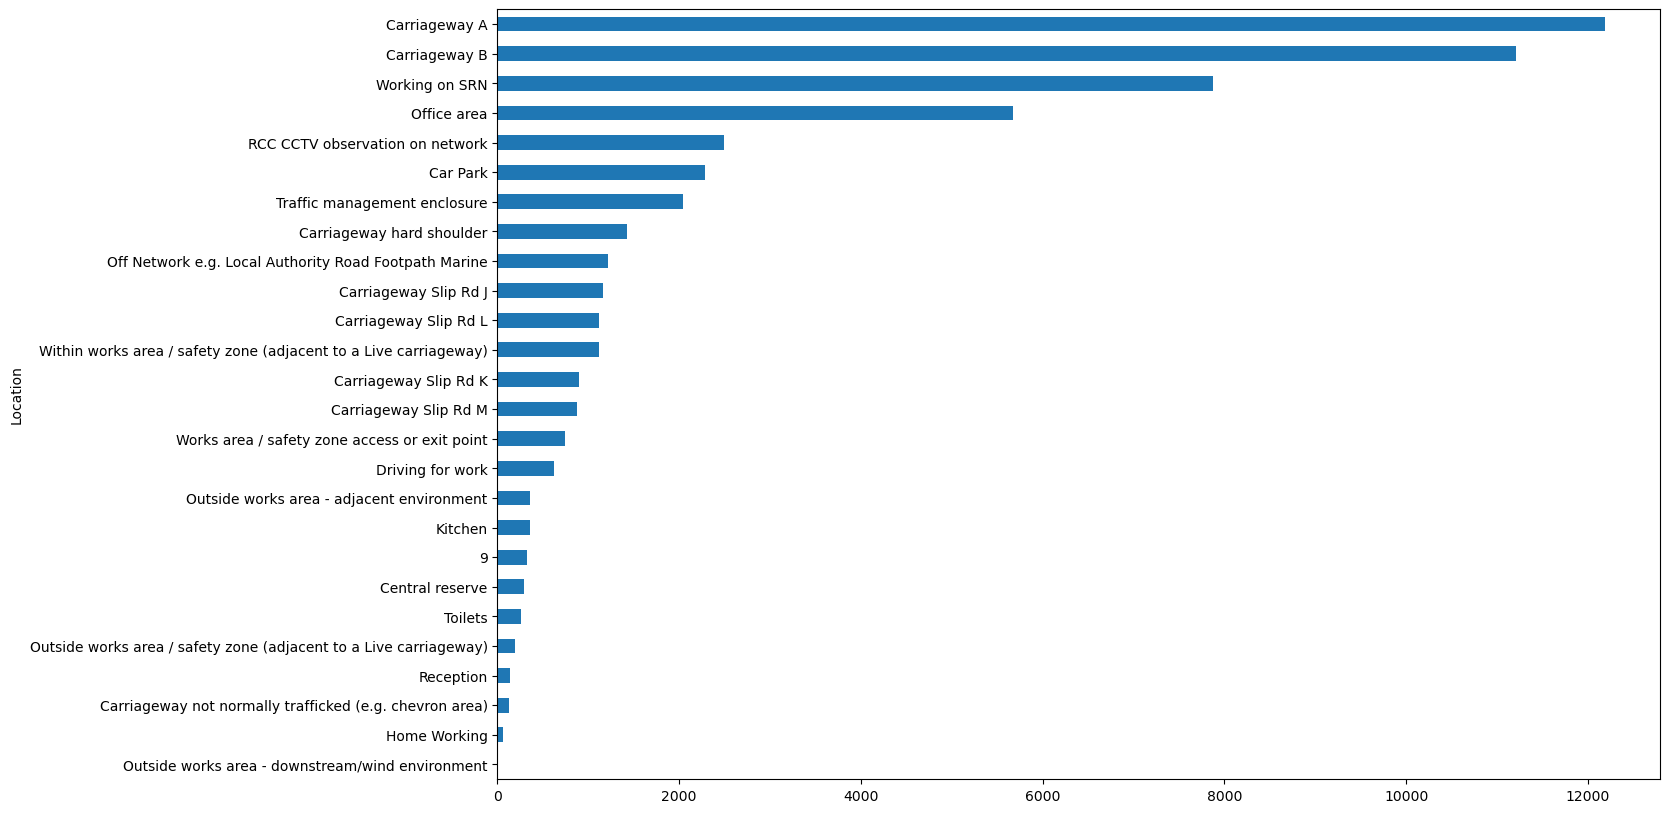

In [36]:
eventlocplot.plot(kind='barh')

The top 5 locations with incidents happening include; Carriageway A, Carriageway B, Working on SRN, Office area and  RCC CCTV observation on network.

In [37]:
df.describe()

,PublishedRecordId,Time into Shift,Experience in Current Role,Age Range,Potential Severity Rating,Actual Severity Rating,month,Year
count,64912.00000,7513.000000,64912.000000,64912.000000,64912.000000,64912.000000,64912.000000,64912.000000
mean,52044.79084,-11.572534,7.493761,38.446605,10.425576,6.105358,6.553118,2009.935528
std,32801.41824,511.824562,4.031858,12.159901,5.971257,3.980887,3.440488,143.255874
min,9.00000,-35061.000000,1.000000,18.000000,1.000000,1.000000,1.000000,9.000000
25%,28374.75000,1.500000,4.000000,28.000000,5.000000,5.000000,3.000000,2019.000000
50%,44897.50000,3.483333,8.000000,38.000000,10.000000,5.000000,7.000000,2020.000000
75%,62291.25000,5.850000,11.000000,49.000000,15.000000,5.000000,10.000000,2021.000000
max,131601.00000,8796.083333,14.000000,59.000000,25.000000,25.000000,12.000000,2022.000000


In [38]:
df=df.drop(columns=['time2','time1','Time into Shift'])

# Data cleaning

Drop columns with over 50% missing values

In [39]:
df. info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64912 entries, 0 to 64911
Data columns (total 23 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   PublishedRecordId                 64912 non-null  int64 
 1   Region                            64912 non-null  object
 2   Site/Project                      64912 non-null  object
 3   Event Type                        64912 non-null  object
 4   Date and Time of Event            64912 non-null  object
 5   vehicles involved?                62965 non-null  object
 6   Type of Person                    64911 non-null  object
 7   Location                          55088 non-null  object
 8   Shift Start Date and Time         7513 non-null   object
 9   Did this event occur on the SRN?  6912 non-null   object
 10  Type of road works                820 non-null    object
 11  Type of traffic management        672 non-null    object
 12  Part of Body Affec

replace null values in part of body affected and injury type with column value 'not applicable' because those kind of events do not affect body parts or cause injury

In [40]:
df['Part of Body Affected'] = df['Part of Body Affected'].fillna('Not applicable')
df['Injury Type'] = df['Injury Type'].fillna('Not applicable')

In [41]:
df['Weather / Visibility']=df['Weather / Visibility'].fillna('Not applicable')

In [42]:
df.isnull().sum()

PublishedRecordId                       0
Region                                  0
Site/Project                            0
Event Type                              0
Date and Time of Event                  0
vehicles involved?                   1947
Type of Person                          1
Location                             9824
Shift Start Date and Time           57399
Did this event occur on the SRN?    58000
Type of road works                  64092
Type of traffic management          64240
Part of Body Affected                   0
Injury Type                             0
Experience in Current Role              0
Age Range                               0
Weather / Visibility                    0
Potential Severity Rating               0
Actual Severity Rating                  0
Structural safety risk scores           0
month                                   0
Year                                    0
Season                                  0
dtype: int64

In [43]:
df.duplicated().sum()

79

In [44]:
df.columns

Index(['PublishedRecordId', 'Region', 'Site/Project', 'Event Type',
       'Date and Time of Event', 'vehicles involved?', 'Type of Person',
       'Location', 'Shift Start Date and Time',
       'Did this event occur on the SRN?', 'Type of road works',
       'Type of traffic management', 'Part of Body Affected', 'Injury Type',
       'Experience in Current Role', 'Age Range', 'Weather / Visibility',
       'Potential Severity Rating', 'Actual Severity Rating',
       'Structural safety risk scores', 'month', 'Year', 'Season'],
      dtype='object')

where the Location was 'working on SRN', the column 'Did this event occur on the SRN?' was populated with Yes

In [45]:
conditions=[(df['Location']=='Working on SRN')]

Values= ['Yes']

df['Did this event occur on the SRN?'] = np.select(conditions, Values)

In [46]:
df.loc[(df['Location'] =='Working on SRN')]

,PublishedRecordId,Region,Site/Project,Event Type,Date and Time of Event,vehicles involved?,Type of Person,Location,Shift Start Date and Time,Did this event occur on the SRN?,...,Injury Type,Experience in Current Role,Age Range,Weather / Visibility,Potential Severity Rating,Actual Severity Rating,Structural safety risk scores,month,Year,Season
38,131563,West Midlands - NH Offices & Depots,Bescot Depot,Personal illness or injury,2022-08-09 09:30:00,False,Employee,Working on SRN,2022-08-09 09:30:00,Yes,...,Strain / sprain,7,26,Not applicable,25,25,***REDACTED***,8,2022,Summer
39,131562,North West - Operations,AD - Construction - Ten,Incursion / IPV Strike,2022-08-04 22:48:00,NaN,Contractor,Working on SRN,NaT,Yes,...,Not applicable,2,51,Not applicable,9,16,***REDACTED***,8,2022,Summer
109,131495,North West - Major Projects,MP-0164 - M6 J21A to 26 - SMA,Incursion / IPV Strike,2022-08-06 07:14:00,True,Contractor,Working on SRN,NaT,Yes,...,Not applicable,10,25,Not applicable,7,16,***REDACTED***,8,2022,Summer
123,131482,North West - Outstations & ROCs,Milnrow Outstation,Undesired Circumstance / Near Miss,2022-08-07 12:00:00,False,Employee,Working on SRN,2022-08-07 08:00:00,Yes,...,Not applicable,11,28,Not applicable,16,5,***REDACTED***,8,2022,Summer
195,131411,West Midlands - Outstations & ROCs,Hilton Park Outstation,Undesired Circumstance / Near Miss,2022-08-04 14:00:00,False,Employee,Working on SRN,2022-08-04 06:00:00,Yes,...,Not applicable,11,21,Not applicable,1,5,***REDACTED***,8,2022,Summer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55511,21803,Yorkshire & North East - Outstations & ROCs,Calder Park ROC,Undesired Circumstance / Near Miss,2019-06-29 07:27:00,False,Employee,Working on SRN,NaT,Yes,...,Not applicable,7,41,Not applicable,7,5,***REDACTED***,6,2019,Summer
55692,21622,East Midlands - NH Offices & Depots,Stirling House,Undesired Circumstance / Near Miss,2019-03-20 15:30:00,False,Employee,Working on SRN,NaT,Yes,...,Not applicable,12,24,Not applicable,19,5,***REDACTED***,3,2019,Spring
56085,21229,East - Major Projects,MP-0000 - OD East M11 Essex Package,Personal illness or injury,2019-06-25 13:40:00,False,Employee,Working on SRN,NaT,Yes,...,Strain / sprain,9,21,Not applicable,25,25,***REDACTED***,6,2019,Summer
56709,20605,East - Outstations & ROCs,Heston East Outstation,Undesired Circumstance / Near Miss,2019-06-30 10:45:00,False,Employee,Working on SRN,NaT,Yes,...,Not applicable,9,44,Not applicable,18,5,***REDACTED***,6,2019,Summer


In [47]:
df['Did this event occur on the SRN?'].unique()

array(['0', 'Yes'], dtype=object)

In [48]:
# 'type of person' only had one null value so that row was located 
df[df['Type of Person'].isna()]

,PublishedRecordId,Region,Site/Project,Event Type,Date and Time of Event,vehicles involved?,Type of Person,Location,Shift Start Date and Time,Did this event occur on the SRN?,...,Injury Type,Experience in Current Role,Age Range,Weather / Visibility,Potential Severity Rating,Actual Severity Rating,Structural safety risk scores,month,Year,Season
7243,124672,South East - Outstations & ROCs,Dartford South East Outstation,Undesired Circumstance / Near Miss,2022-02-04 18:00:00,False,NaN,Office area,2022-02-04 14:00:00,0,...,Not applicable,4,55,Not applicable,18,5,***REDACTED***,2,2022,Winter


In [49]:
#from the location off the event that happened which is the office area, the type of person is more likely to be an employee 
df['Type of Person']=df['Type of Person'].fillna('Employee')

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64912 entries, 0 to 64911
Data columns (total 23 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   PublishedRecordId                 64912 non-null  int64 
 1   Region                            64912 non-null  object
 2   Site/Project                      64912 non-null  object
 3   Event Type                        64912 non-null  object
 4   Date and Time of Event            64912 non-null  object
 5   vehicles involved?                62965 non-null  object
 6   Type of Person                    64912 non-null  object
 7   Location                          55088 non-null  object
 8   Shift Start Date and Time         7513 non-null   object
 9   Did this event occur on the SRN?  64912 non-null  object
 10  Type of road works                820 non-null    object
 11  Type of traffic management        672 non-null    object
 12  Part of Body Affec

In [51]:
#drop the columns with less than 50% of the data available
df=df.drop(columns=['Structural safety risk scores','Shift Start Date and Time','Type of road works','Type of traffic management'])

In [52]:
df[df['Location'].isna()]

,PublishedRecordId,Region,Site/Project,Event Type,Date and Time of Event,vehicles involved?,Type of Person,Location,Did this event occur on the SRN?,Part of Body Affected,Injury Type,Experience in Current Role,Age Range,Weather / Visibility,Potential Severity Rating,Actual Severity Rating,month,Year,Season
3,131598,North West - Outstations & ROCs,Milness Outstation,Undesired Circumstance / Near Miss,2022-08-09 17:10:00,False,Employee,NaN,0,Not applicable,Not applicable,3,30,Not applicable,11,5,8,2022,Summer
5,131596,North West - Outstations & ROCs,Milness Outstation,Undesired Circumstance / Near Miss,2022-08-09 16:00:00,False,Employee,NaN,0,Not applicable,Not applicable,1,24,Not applicable,6,5,8,2022,Summer
6,131595,East - Operations,Area 6 & 8,Incursion / IPV Strike,2022-08-09 01:00:00,NaN,Contractor,NaN,0,Not applicable,Not applicable,13,35,Not applicable,18,16,8,2022,Summer
11,131590,South East - Operations,Area 4,Undesired Circumstance / Near Miss,2022-08-08 21:35:00,NaN,Employee,NaN,0,Not applicable,Not applicable,7,33,Not applicable,2,5,8,2022,Summer
12,131589,South East - Operations,Area 4,Undesired Circumstance / Near Miss,2022-08-08 21:20:00,NaN,Employee,NaN,0,Not applicable,Not applicable,5,41,Not applicable,12,5,8,2022,Summer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64886,8114,North West - Outstations & ROCs,Newton-Le-Willows ROC,Undesired Circumstance / Near Miss,2018-11-04 04:39:00,False,Employee,NaN,0,Not applicable,Not applicable,5,20,Not applicable,17,5,11,2018,Autumn
64887,8113,North West - Outstations & ROCs,Newton-Le-Willows ROC,Undesired Circumstance / Near Miss,2018-10-05 23:30:00,False,Employee,NaN,0,Not applicable,Not applicable,3,53,Not applicable,1,5,10,2018,Autumn
64889,8097,North West - Outstations & ROCs,Knutsford Outstation,Infrastructure / Asset,2018-08-12 12:15:00,False,Employee,NaN,0,Not applicable,Not applicable,4,54,Not applicable,16,13,8,2018,Summer
64898,8078,South West - Operations,Area 1 & 2,Undesired Circumstance / Near Miss,2018-10-16 10:00:00,False,Employee,NaN,0,Not applicable,Not applicable,6,45,Not applicable,11,5,10,2018,Autumn


In [53]:
NationalMajorProjects=df.loc[df['Region']=='National - Major Projects']

In [54]:
df.loc[df['Event Type']=='Incursion / IPV Strike', 'vehicles involved?']='True'
df.loc[df['Event Type']=='Undesired Circumstance / Near Miss', 'vehicles involved?']='False'
df.loc[df['Event Type']=='Infrastructure / Asset', 'vehicles involved?']='False'
df.loc[df['Event Type']=='Facilities / Site', 'vehicles involved?']='False'
#df.loc[df['Event Type']=='Environmental', 'vehicles involved?']='False'
df.loc[df['Event Type']=='Personal injury', 'vehicles involved?']='False'

In [55]:
df.loc[df['vehicles involved?']== True]=1
df.loc[df['vehicles involved?']== False]=0

In [56]:
df['Location'].fillna('Not available')

0                                    Carriageway Slip Rd K
1                                            Carriageway B
2                                    Carriageway Slip Rd J
3                                            Not available
4        Off Network e.g. Local Authority Road Footpath...
                               ...                        
64907                                        Carriageway B
64908                                        Carriageway A
64909                                        Carriageway A
64910                                        Not available
64911    Off Network e.g. Local Authority Road Footpath...
Name: Location, Length: 64912, dtype: object

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64912 entries, 0 to 64911
Data columns (total 19 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   PublishedRecordId                 64912 non-null  int64 
 1   Region                            64912 non-null  object
 2   Site/Project                      64912 non-null  object
 3   Event Type                        64912 non-null  object
 4   Date and Time of Event            64912 non-null  object
 5   vehicles involved?                64867 non-null  object
 6   Type of Person                    64912 non-null  object
 7   Location                          55488 non-null  object
 8   Did this event occur on the SRN?  64912 non-null  object
 9   Part of Body Affected             64912 non-null  object
 10  Injury Type                       64912 non-null  object
 11  Experience in Current Role        64912 non-null  int32 
 12  Age Range         

In [58]:
df.isnull().sum()

PublishedRecordId                      0
Region                                 0
Site/Project                           0
Event Type                             0
Date and Time of Event                 0
vehicles involved?                    45
Type of Person                         0
Location                            9424
Did this event occur on the SRN?       0
Part of Body Affected                  0
Injury Type                            0
Experience in Current Role             0
Age Range                              0
Weather / Visibility                   0
Potential Severity Rating              0
Actual Severity Rating                 0
month                                  0
Year                                   0
Season                                 0
dtype: int64

In [59]:
df.loc[df['vehicles involved?'].isna()]

,PublishedRecordId,Region,Site/Project,Event Type,Date and Time of Event,vehicles involved?,Type of Person,Location,Did this event occur on the SRN?,Part of Body Affected,Injury Type,Experience in Current Role,Age Range,Weather / Visibility,Potential Severity Rating,Actual Severity Rating,month,Year,Season
14,131587,South East - Operations,Area 4,Environmental,2022-08-08 21:25:00,NaN,Employee,NaN,0,Not applicable,Not applicable,10,27,Not applicable,17,7,8,2022,Summer
601,131021,North West - Operations,Area 10,Environmental,2022-07-26 10:00:00,NaN,Employee,Working on SRN,Yes,Not applicable,Not applicable,12,59,Not applicable,3,1,7,2022,Summer
777,130845,North West - Operations,AD - Construction - Ten,Security,2022-07-21 09:00:00,NaN,Employee,Off Network e.g. Local Authority Road Footpath...,0,Not applicable,Not applicable,9,30,Not applicable,11,14,7,2022,Summer
811,130811,North West - Operations,AD - Construction - Ten,Personal illness or injury,2022-07-20 09:30:00,NaN,Employee,Off Network e.g. Local Authority Road Footpath...,0,Not applicable,Not applicable,6,50,Not applicable,25,25,7,2022,Summer
902,130728,Midlands - Operations,AD - M&R - Seven,Personal illness or injury,2022-07-15 15:00:00,NaN,Contractor,NaN,0,Chest/Stomach,Other,11,29,Not applicable,25,25,7,2022,Summer
1161,130479,South East - Operations,Area 4,Environmental,2022-07-07 19:30:00,NaN,Employee,NaN,0,Not applicable,Not applicable,7,30,Not applicable,18,11,7,2022,Summer
1264,130384,South East - Operations,Area 4,Environmental,2022-07-06 20:30:00,NaN,Employee,NaN,0,Not applicable,Not applicable,8,22,Not applicable,16,13,7,2022,Summer
1274,130373,South East - Outstations & ROCs,Dartford South East Outstation,Personal illness or injury,2022-07-07 10:30:00,NaN,Employee,Car Park,0,"Finger/Thumb, Head","Swelling / Oedema, Bruising, Cut / laceration",4,49,Not applicable,25,25,7,2022,Summer
1275,130372,South East - Major Projects,MP-0267 - A31 Ringwood Improvements,Personal illness or injury,2022-06-16 19:30:00,NaN,Employee,NaN,0,Hip,Fracture,14,35,Not applicable,25,25,6,2022,Summer
1369,130283,North West - Operations,Area 10,Environmental,2022-07-05 09:30:00,NaN,Employee,Working on SRN,Yes,Not applicable,Not applicable,2,33,Not applicable,11,7,7,2022,Summer


In [60]:
df.loc[df['Type of Person']=='Employee', 'Type_of_work']='Traffic management/control'
df.loc[df['Type of Person']=='Contractor', 'Type_of_work']='Highway construction work'
df.loc[df['Type of Person']=='Member of the Public', 'Type_of_work']='Not applicable'
df.loc[df['Type of Person']=='Customer', 'Type_of_work']='Not applicable'
#df.loc[df['Event Type']=='Incursion / IPV Strike', 'vehicles involved?']='True'

In [61]:
df['Type of Person'].unique()

array(['Employee', 'Contractor', 0, 'Member of the Public', 9, 1,
       'Customer'], dtype=object)

In [62]:
df.loc[df['Event Type']=='Utility Strike']

,PublishedRecordId,Region,Site/Project,Event Type,Date and Time of Event,vehicles involved?,Type of Person,Location,Did this event occur on the SRN?,Part of Body Affected,Injury Type,Experience in Current Role,Age Range,Weather / Visibility,Potential Severity Rating,Actual Severity Rating,month,Year,Season,Type_of_work


# Creating injury occurrence column

In [63]:
df.loc[df['Event Type']=='Personal illness or injury','Injury occurrence']='Yes'
df['Injury occurrence']= df['Injury occurrence'].fillna('No')

In [64]:
df['Injury occurrence'].unique()

array(['No', 'Yes'], dtype=object)

##more employees are involved in accidents as compared to contractors

In [65]:
worker_injury_category = df[df['Event Type'] == 'Personal illness or injury'].groupby(['Type of Person'], as_index = False)['Injury occurrence'].count()
worker_injury_category

,Type of Person,Injury occurrence
0,Contractor,6
1,Employee,10


<AxesSubplot:xlabel='Type of Person'>

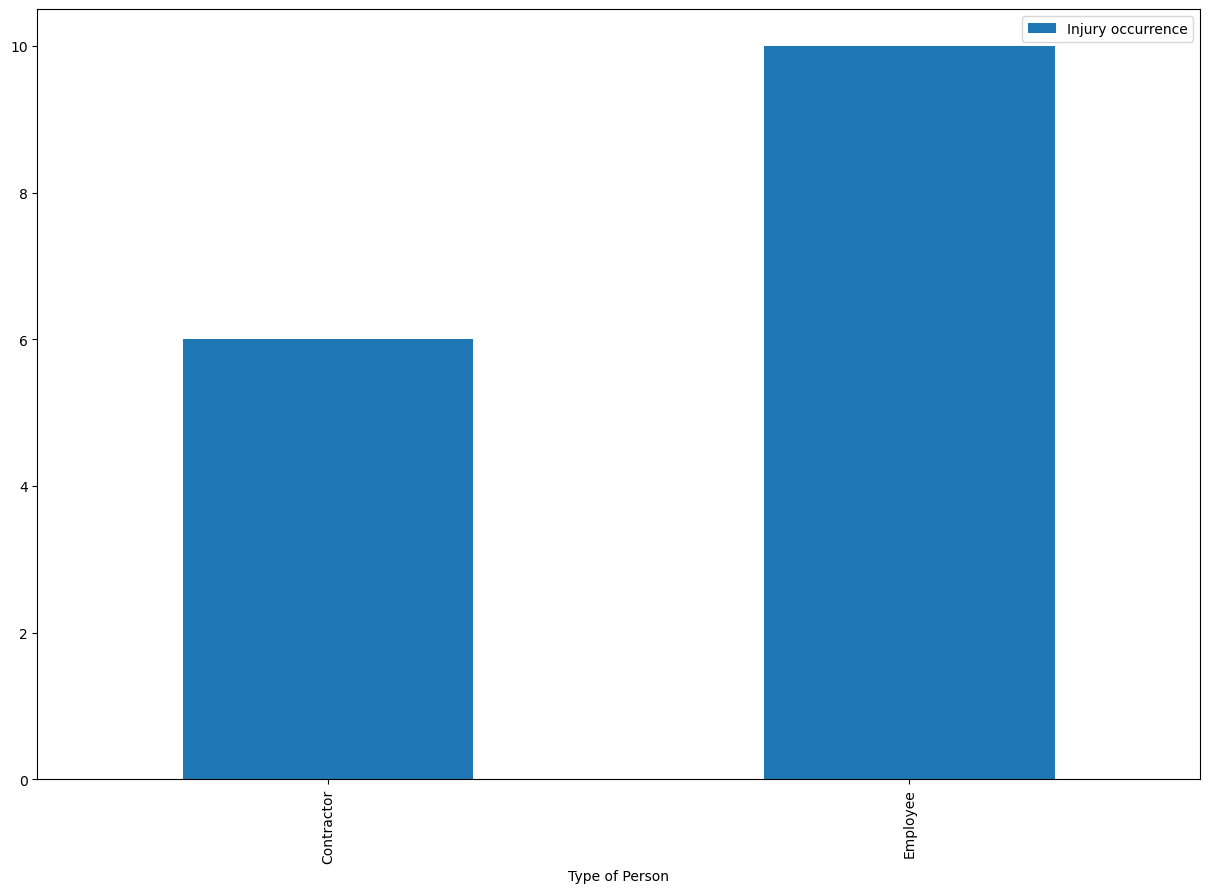

In [66]:
worker_injury_category.plot(x='Type of Person', y='Injury occurrence',kind='bar')

In [73]:
TP=df['Type of Person'].value_counts()

<AxesSubplot:>

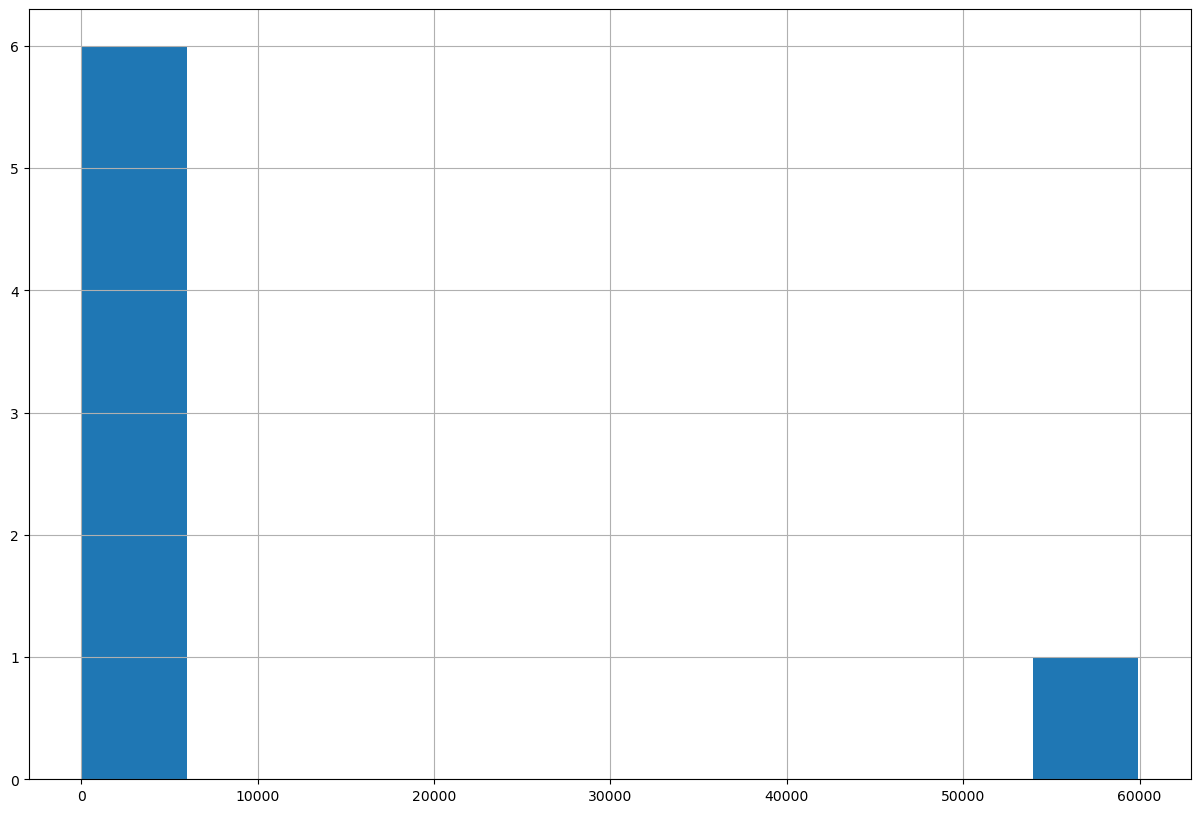

In [74]:
TP.hist()

# Events per year

In [75]:
events_per_year= df.groupby(['Year'], as_index=False)['Event Type'].count()
events_per_year

,Year,Event Type
0,0,2993
1,1,268
2,9,331
3,2018,5033
4,2019,13249
5,2020,15290
6,2021,19467
7,2022,8281


Text(0, 0.5, 'Counts')

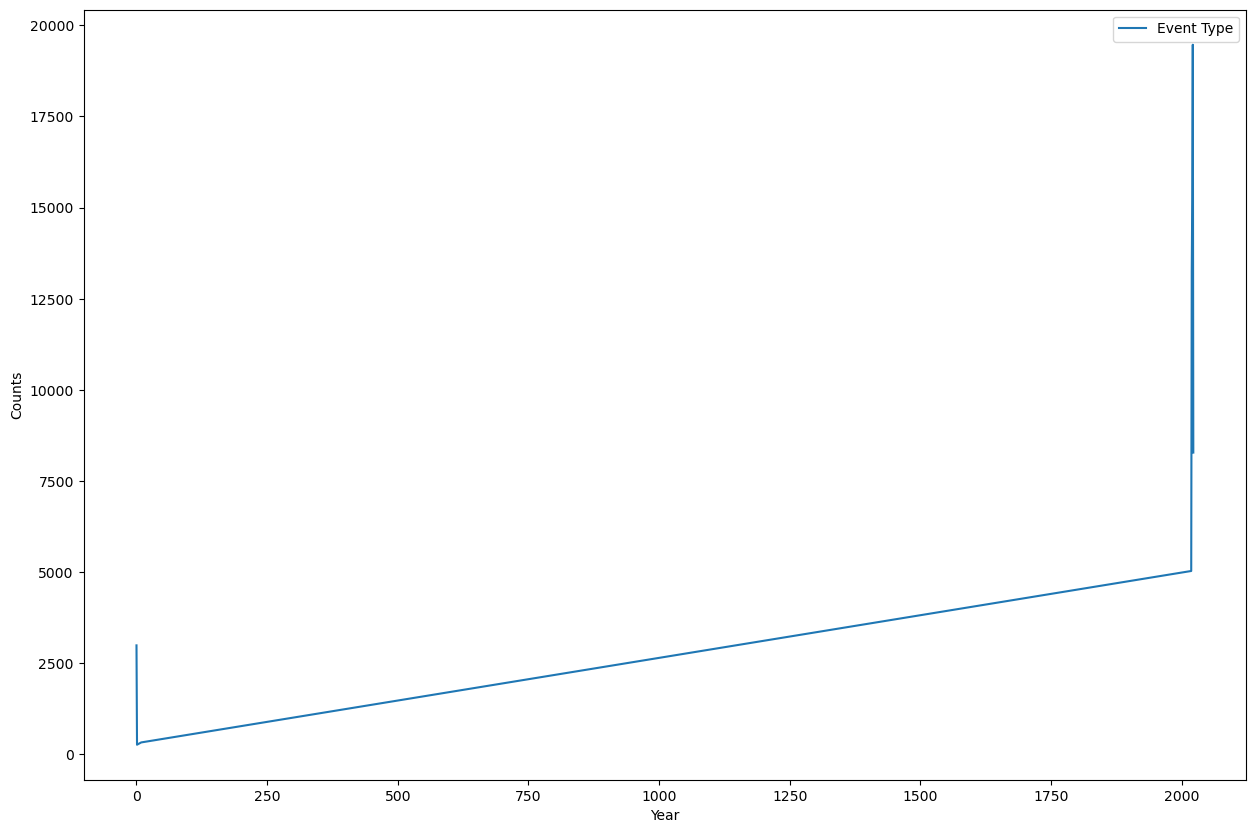

In [76]:
events_per_year.plot(x='Year',y='Event Type')
plt.ylabel('Counts')

# injuries per year

In [77]:
personal_injuries_per_year = df[df['Event Type'] == 'Personal illness or injury'].groupby(['Year'], as_index = False)['Injury occurrence'].count()
personal_injuries_per_year 

,Year,Injury occurrence
0,2022,16


In [ ]:
personal_injuries_per_year.plot(x='Year',y='Injury occurrence')
plt.ylabel('counts')

In [ ]:
tab=pd.merge(events_per_year, personal_injuries_per_year, on='Year') #ignore_index=True, sort=False)
tab

In [ ]:
tab.plot(x='Year')
ytick=(100,200,300,500,600,1000,3000,5000,10000,12000,15000,20000)
plt.ylabel('counts')

In [ ]:
tab.plot(x='Event Type',y='Injury occurrence')

# project risk level

In [ ]:
condi=[(df['Actual Severity Rating']<10), (df['Actual Severity Rating']>=10) & (df['Actual Severity Rating']<20),
       (df['Actual Severity Rating']>=20) & (df['Actual Severity Rating']<26),df['Event Type']=='Personal illness or injury']

Val= ['low', 'medium','High', 'High']

df['Project risk level'] = np.select(condi, Val)

In [ ]:
df['Project risk level'].unique()

# Season with the most incident events

In [ ]:
event_by_season= df.groupby(['Season'], as_index=False)['Event Type'].count()
event_by_season

In [ ]:
event_by_season.plot(x='Season', y= 'Event Type', kind='bar')

Autumn has the most events, followed by summer, then winter and spring

# Day of the week

In [ ]:
df['day_of_week'] = df['Date and Time of Event'].dt.day_name()

# finding time of day (morning, afternoon, evening or night)

In [ ]:
df['time']=pd.DatetimeIndex(df['Date and Time of Event']).hour

In [ ]:
cond=[(df['time']>=7)&(df['time']<12), (df['time']>=12) & (df['time']<16), (df['time']>=16) & (df['time']<20), 
      (df['time']>=20)&(df['time']<=23)
           ]

Vals= ['Morning', 'Afternoon','Evening','Night']

df['time_of_day'] = np.select(cond, Vals)

In [ ]:
df.head(3)

# which day has the most incident event happening

In [ ]:
event_by_day= df.groupby(['day_of_week'], as_index=False)['Event Type'].count()
event_by_day

In [ ]:
field = "day_of_week"
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
ax = event_by_day.set_index(field).loc[day_order].plot(kind="bar", legend=False)
ax.set_ylabel("Frequency of event occurence")


#event_by_day.plot(x='day_of_week', y= 'Event Type', kind='bar')

In [ ]:
df.columns

In [ ]:
#df.loc[(df['Event Type']=='Undesired Circumstance / Near Miss').value_counts(),'Year']

# Injuries per day

In [ ]:
personal_injuries_per_day = df[df['Event Type'] == 'Personal illness or injury'].groupby(['day_of_week'], as_index = False)['Event Type'].count()
personal_injuries_per_day 

In [ ]:
field = "day_of_week"
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
ax = personal_injuries_per_day.set_index(field).loc[day_order].plot(kind="bar", legend=False)
ax.set_ylabel("Frequency of injury occurence")


#personal_injuries_per_day.plot(x='day_of_week', y= 'Event Type', kind='bar')
#plt.xlabel("day_of_week")
#plt.ylabel("Frequency of injury occurence")

In [ ]:
project_event_risk = df.groupby(['Project risk level'], as_index=False)['Event Type'].count()
project_event_risk

# creating the injury occurrence column

# injury by season

In [ ]:
personal_injuries_per_season = df[df['Event Type'] == 'Personal illness or injury'].groupby(['Season'], as_index = False)['Event Type'].count()
personal_injuries_per_season
plt.ylabel('Frequency of injuries')

In [ ]:
personal_injuries_per_season.plot(x='Season',y='Event Type', kind='bar')

# model building

In [ ]:
df=df.dropna()

In [ ]:
df["vehicles involved?"].replace({"True": "Yes", "False": "No"}, inplace=True)

In [ ]:
df["vehicles involved?"].replace({"Yes": "1", "No": "0"}, inplace=True)

In [ ]:
df.head()

In [ ]:
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
le = preprocessing.LabelEncoder()
#label_encoder2 = preprocessing.LabelEncoder()
#le_transform = label_encoder2.fit_transform(df['Event Type'])
#df['Event Type']= le_transform 
df['day_of_week']= le.fit_transform(df['day_of_week'])
df['Injury occurrence']= le.fit_transform(df['Injury occurrence'])
df['Type_of_work']= le.fit_transform(df['Type_of_work'])
df['Project risk level']= le.fit_transform(df['Project risk level'])
df['Season']= le.fit_transform(df['Season'])
df['month']= le.fit_transform(df['month'])
df['Injury Type']= le.fit_transform(df['Injury Type'])
df['Part of Body Affected']= le.fit_transform(df['Part of Body Affected'])
df['Did this event occur on the SRN?']= le.fit_transform(df['Did this event occur on the SRN?'])
df['Location']= le.fit_transform(df['Location'])
df['Type of Person']= le.fit_transform(df['Type of Person'])
df['Site/Project']= le.fit_transform(df['Site/Project'])
df['Region']= le.fit_transform(df['Region'])
df['time_of_day']= le.fit_transform(df['time_of_day'])
df['Weather / Visibility']= le.fit_transform(df['Weather / Visibility'])
df['Event Type']=le.fit_transform(df['Event Type'])

In [ ]:
matrix=df.corr()

In [ ]:
plt.figure(figsize=(14,9))
sns.heatmap(matrix,cmap='Reds',annot=True)
plt.show()

In [ ]:
event_label_data= df.drop(['Date and Time of Event','Event Type',], axis=1)

In [ ]:
event_matrix=event_label_data.corr()

In [ ]:
plt.figure(figsize=(14,9))
sns.heatmap(event_matrix,cmap='Reds',annot=True)
plt.show()

# building the model

In [ ]:
X= df.drop(['Date and Time of Event','vehicles involved?','Event Type','time','PublishedRecordId'], axis=1)
y=df['Event Type']

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
MinMaxScaler
X=scaler.transform(X)

In [ ]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=109) # 70% training and 30% test


In [ ]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='poly') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)


In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


In [ ]:
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred,average='micro'))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred,average='micro'))


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

pip install imblearn

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
X_smote, y_smote = smote.fit_resample(X, y)

print('Original dataset shape', y.count())
print('Resample dataset shape', y_smote.count())

In [ ]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X_smote, y_smote, test_size=0.3,random_state=109) # 70% training and 30% test

In [ ]:
#Import svm model
from sklearn import svm
#Create a svm Classifier
clf2 = svm.SVC(kernel='rbf') # Linear Kernel

#Train the model using the training sets
clf2.fit(X1_train[0:50000], y1_train[0:50000])

#Predict the response for test dataset
y1_pred = clf2.predict(X1_test)


In [ ]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y1_test, y1_pred))

In [ ]:
print("Precision:",metrics.precision_score(y1_test, y1_pred,average='micro'))

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix 
print(confusion_matrix(y1_test,y1_pred))
print(classification_report(y1_test,y1_pred))

In [ ]:
#all_classes = label_encoder2.classes_
#labels= ['Undesired Circumstance / Near Miss', 'Incursion / IPV Strike',
 #      'Infrastructure / Asset', 'Environmental',
  #     'Personal illness or injury', 'Structural Safety', 'Security',
   #    'Facilities / Site', 'Utility Strike']

#tras = label_encoder2.fit_transform(labels)
#print(tras)
#inverted= label_encoder2.inverse_transform(tras)
#print(inverted)


In [ ]:
inverted= le.inverse_transform(df['Event Type'])

In [ ]:
inverted

In [ ]:
X2= df.drop(['Date and Time of Event','vehicles involved?','Event Type','time','PublishedRecordId'], axis=1)
y2=df['Event Type']